#**Traffic Sign Detection**

# **What is Traffic Sign Detection?**

Traffic-sign recognition (TSR) is a technology by which a vehicle is able to recognize the traffic signs put on the road e.g. "speed limit" or "children" or "turn ahead" using images as a dataset.

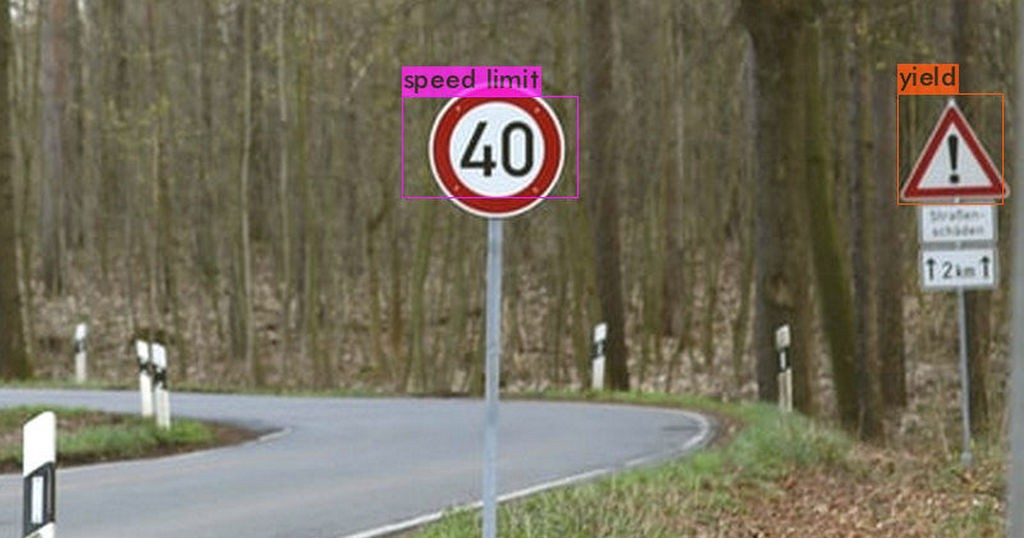

# **Methodology:**
1. Importing required libraries
2. Mounting google drive and importing data from kaggle 
3. Dataset
4. Model Building
5. Plots
6. Testing the model
7. Saving the model for further use
8. Prediction on new data

Conclusion

References


#**1. Import required libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

#**2. Mounting google drive and importing data from kaggle**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip /content/gdrive/MyDrive/Kaggle/gtsrb-german-traffic-sign.zip

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'/content/gdrive/My Drive/Kaggle'

#**3. Dataset:**

**Description of dataset:**
* Contains 43 classes
* More than 50,000 images in total


In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

**Converting lists into numpy arrays:**

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


**Splitting the data into train-test i.e. train=0.8 and test=0.2**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**Convert labels to onehot encoding**

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#**4. Model building:**

**Creating a model:**

In [ ]:
#Creating a model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

**Compiling the model:**

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the model:**

In [ ]:
#Training the model with 20 epochs
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 143s 144ms/step - loss: 1.7050 - accuracy: 0.5621 - val_loss: 0.4132 - val_accuracy: 0.9185
Epoch 2/20
981/981 [==============================] - 133s 135ms/step - loss: 0.5983 - accuracy: 0.8257 - val_loss: 0.1700 - val_accuracy: 0.9560
Epoch 3/20
981/981 [==============================] - 132s 134ms/step - loss: 0.4336 - accuracy: 0.8738 - val_loss: 0.1761 - val_accuracy: 0.9563
Epoch 4/20
981/981 [==============================] - 132s 134ms/step - loss: 0.3660 - accuracy: 0.8919 - val_loss: 0.1021 - val_accuracy: 0.9682
Epoch 5/20
981/981 [==============================] - 132s 134ms/step - loss: 0.3086 - accuracy: 0.9106 - val_loss: 0.0750 - val_accuracy: 0.9787
Epoch 6/20
981/981 [==============================] - 132s 135ms/step - loss: 0.3055 - accuracy: 0.9113 - val_loss: 0.1123 - val_accuracy: 0.9676
Epoch 7/20
981/981 [==============================] - 132s 135ms/step - loss: 0.2756 - accuracy: 0.9184 - val_loss: 0.0739 -

# **5. Plots:**

**Plot for Accuracy:**

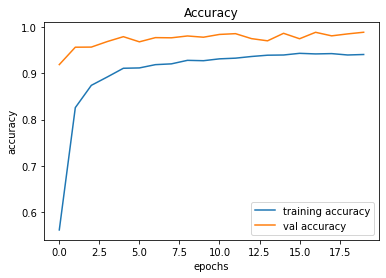

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Plot for Loss:**

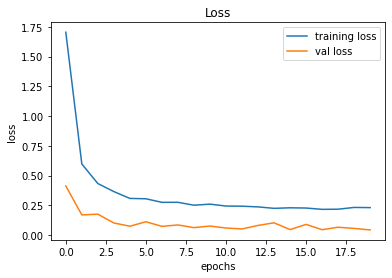

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Creating a Confusion Matrix:**

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

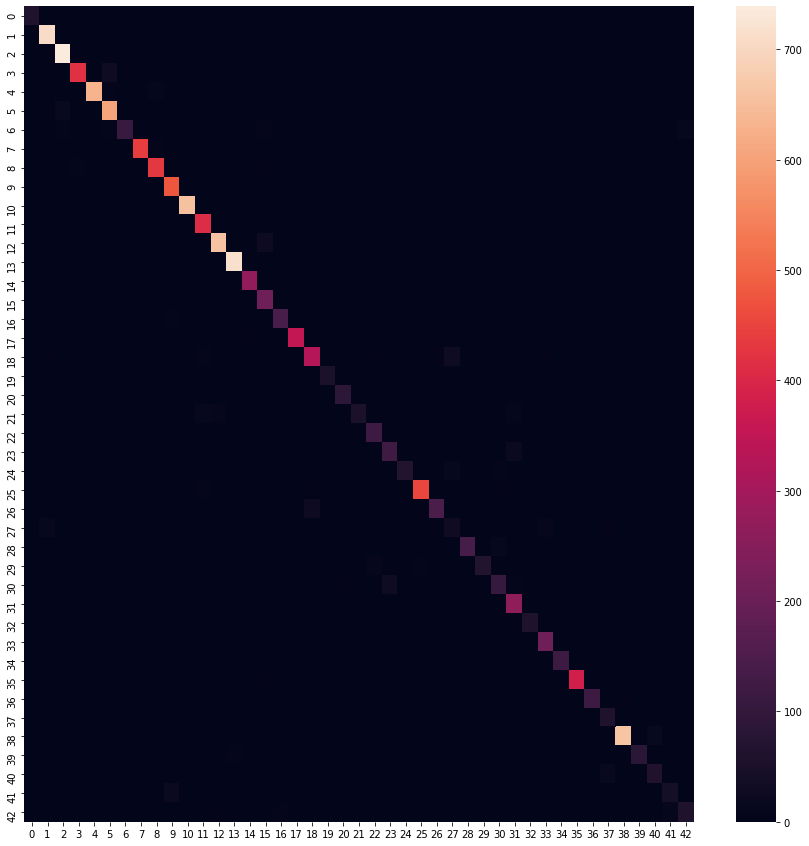

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(test_labels,predictions))

# **6. Testing the model:**

**Loading the test dataset:**

In [ ]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/content/gdrive/MyDrive/Kaggle/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "/content/gdrive/MyDrive/Kaggle/"
test_imgs = test['Path'].values

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
test_data = []
test_labels = []

In [ ]:
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

(12630, 30, 30, 3)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

array([16,  1, 38, ...,  6,  7, 10])

**Accuracy:**

In [ ]:
predictions=np.argmax(model.predict(test_data),axis=-1)

In [ ]:
print("accuracy: ", accuracy_score(test_labels, predictions)) #Accuracy of the model

accuracy:  0.9456057007125891


**Generating a Classification report:**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_labels, predictions)) #Classification report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.95      0.99      0.97       720
           2       0.96      0.99      0.97       750
           3       0.96      0.94      0.95       450
           4       1.00      0.96      0.98       660
           5       0.91      0.96      0.94       630
           6       0.98      0.73      0.84       150
           7       0.99      0.98      0.98       450
           8       0.95      0.96      0.96       450
           9       0.94      1.00      0.97       480
          10       0.99      0.99      0.99       660
          11       0.93      0.98      0.95       420
          12       0.98      0.96      0.97       690
          13       0.99      1.00      0.99       720
          14       0.97      1.00      0.99       270
          15       0.82      1.00      0.90       210
          16       0.95      0.96      0.95       150
          17       1.00    

# **7. Saving the model**

In [ ]:
model.save("Traffic_sign.h5") #.h5 file

In [ ]:
model.save("Traffic.hdf5")  #.hdf5 file

**Loading the .h5 file**

In [ ]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Kaggle/Traffic_sign.h5')

# **8. Prediction on new data:**

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

**Making Predictions:**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


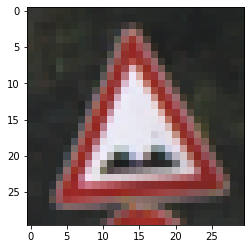

In [ ]:
plot,prediction = test_on_img(r'/content/gdrive/MyDrive/Kaggle/Test/0/00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

# **Conculsion:**
In this way,

1) I have implemented Traffic Sign detection with an accuracy of **0.94%**. 

2) I have also visualized the graps for losses and accuracy.

3) Made predictions on new data. 

# **References:**
1) https://online-journals.org/index.php/i-joe/article/view/18545

2) Recognising Traffic Signs With 98% Accuracy Using Deep Learning: https://towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab 

3) Traffic Sign Detection using Convolutional Neural Network :https://towardsdatascience.com/traffic-sign-detection-using-convolutional-neural-network-660fb32fe90e

4) Convolutional Neural Network: Learn And Apply: https://medium.com/@sdoshi579/convolutional-neural-network-learn-and-apply-3dac9acfe2b6

5)Traffic Sign Detection and Recognition using a CNN Ensemble : https://ieeexplore.ieee.org/document/8662019